Text(0.5, 1.0, 'PD Subject-Class Ga')

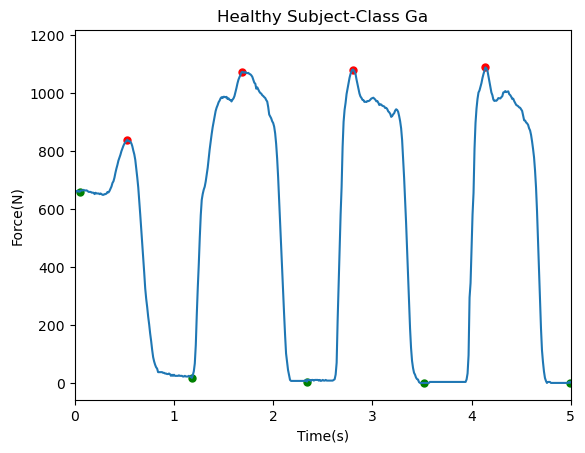

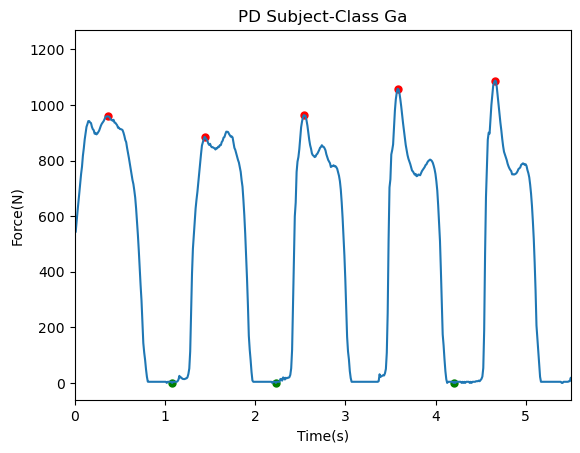

In [48]:
#program that takes   datasets as inputs plots time vs force graph along with highlighting the peaks
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy import fftpack as fft
dataset1=pd.read_csv("ga.csv")
dataset2=pd.read_csv("Ga_Pt.csv")
data_ga=dataset1.set_index(["time"])
data_ga_pd=dataset2.set_index(["time"])
x1=data_ga.index
y1=data_ga.L
x2=data_ga_pd.index
y2=data_ga_pd.L
#finding peaks and indexing 
p1=find_peaks(y1,height=1,distance=100)
h1=p1[1]["peak_heights"]
pos1=x1[p1[0]]
p2=find_peaks(y2,height=1,distance=100)
h2=p2[1]["peak_heights"]
pos2=x2[p2[0]]
#finding minma and indexing
y1_min=y1*-1
minima=find_peaks(y1_min,distance=100)
min_pos1=x1[minima[0]]
min_height1=y1.iloc[minima[0]]
y2_min=y2*-1
minima2=find_peaks(y2_min,distance=100)
min_pos2=x2[minima2[0]]
min_height2=y2.iloc[minima2[0]]

#plotting
plt.plot(x1,y1)
plt.scatter(pos1,h1,color="r",marker="o",s=25)
plt.scatter(min_pos1,min_height1,color="g",marker="o",s=25)

plt.xlim(0,5)
plt.xlabel("Time(s)")
plt.ylabel("Force(N)")
plt.title("Healthy Subject-Class Ga")

plt.figure()

plt.plot(x2,y2)
plt.scatter(pos2,h2,color="r",marker="o",s=25)
plt.scatter(min_pos2,min_height2,color="g",marker="o",s=25)
plt.xlim(0,5.5)
plt.xlabel("Time(s)")
plt.ylabel("Force(N)")
plt.title("PD Subject-Class Ga")


0.009998473471408531
[ 0.          0.00825277  0.01650553 ... -0.0247583  -0.01650553
 -0.00825277]
[0.00000000e+00 8.25276571e-03 1.65055314e-02 ... 4.99787491e+01
 4.99870019e+01 4.99952547e+01]


Text(0, 0.5, 'Power')

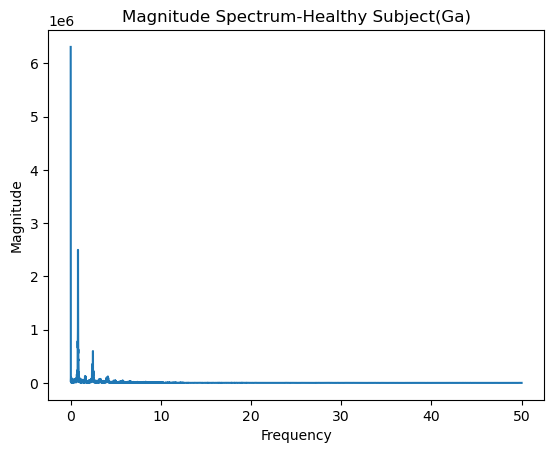

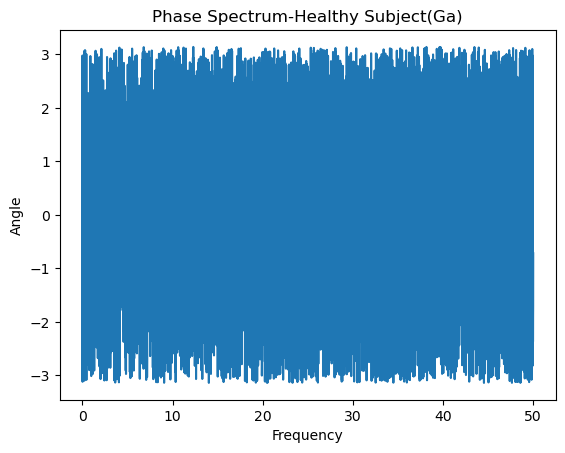

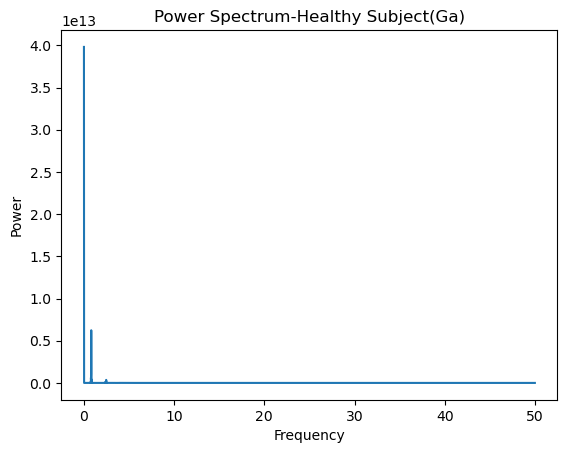

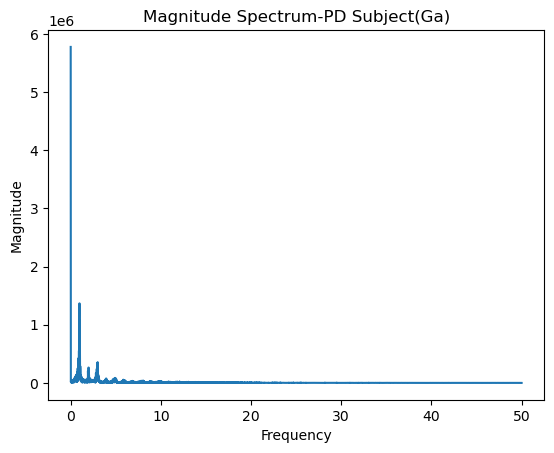

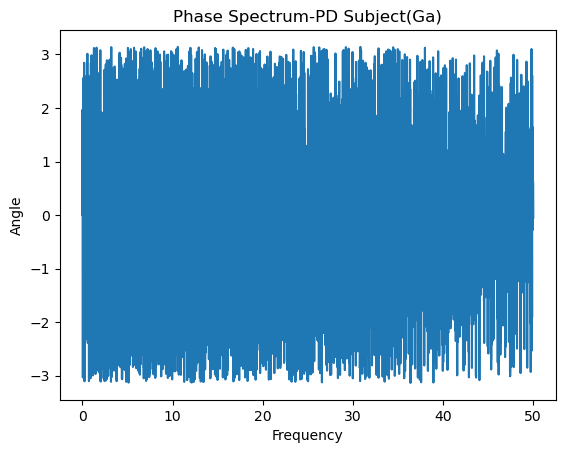

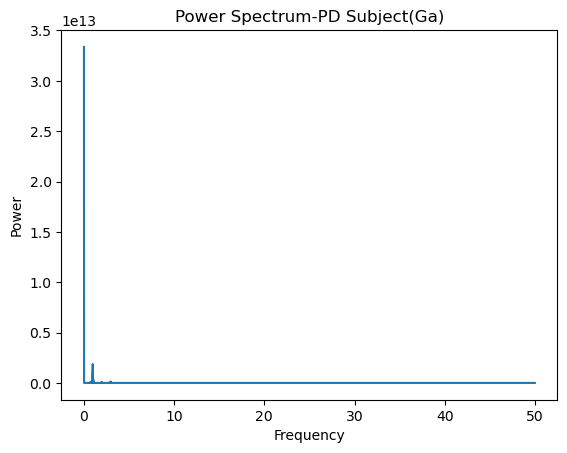

In [225]:
#program that takes   datasets as inputs and computes the frequency domain charecterstics including magnitude,phase,power spectrum
from scipy import fftpack as fft
#healthy subject
L1=len(y1)

T1=(x1.max()-x1.min())/L1
print(T1)
y1_np=np.asarray(y1)

fft_y1=fft.fft(y1_np)
#magnitude spectrum-healthy subject
y1_abs=np.abs(fft_y1[0:L1//2])
f1=fft.fftfreq(L1,T1)
print(f1)
f1_half=f1[:L1//2]
print(f1_half)
plt.plot(f1_half,y1_abs)
plt.title("Magnitude Spectrum-Healthy Subject(Ga)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
#phase spectrum-healthy subject
y1_angle=np.angle(fft_y1[:L1//2])
plt.figure()
plt.plot(f1_half,y1_angle)
plt.title("Phase Spectrum-Healthy Subject(Ga)")
plt.xlabel("Frequency")
plt.ylabel("Angle")
plt.figure()
#power spectrum-healthy subject
y1_power=y1_abs**2
plt.plot(f1_half,y1_power)
plt.title("Power Spectrum-Healthy Subject(Ga)")
plt.xlabel("Frequency")
plt.ylabel("Power")
#PD subject
L2=len(y2)
T2=(x2.max()-x2.min())/L2
y2_np=np.asarray(y2)
fft_y2=fft.fft(y2_np)
#magnitude spectrum-PD subject
y2_abs=np.abs(fft_y2[:L2//2])
f2=fft.fftfreq(L2,T2)
f2_half=f2[:L2//2]
plt.figure()
plt.plot(f2_half,y2_abs)
plt.title("Magnitude Spectrum-PD Subject(Ga)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
#phase spectrum-PD subject
y2_angle=np.angle(fft_y2[:L2//2])
plt.figure()
plt.plot(f1_half,y2_angle)
plt.title("Phase Spectrum-PD Subject(Ga)")
plt.xlabel("Frequency")
plt.ylabel("Angle")
plt.figure()
#power spectrum-PD subject
y2_power=y2_abs**2
plt.plot(f1_half,y2_power)
plt.title("Power Spectrum-PD Subject(Ga)")
plt.xlabel("Frequency")
plt.ylabel("Power")


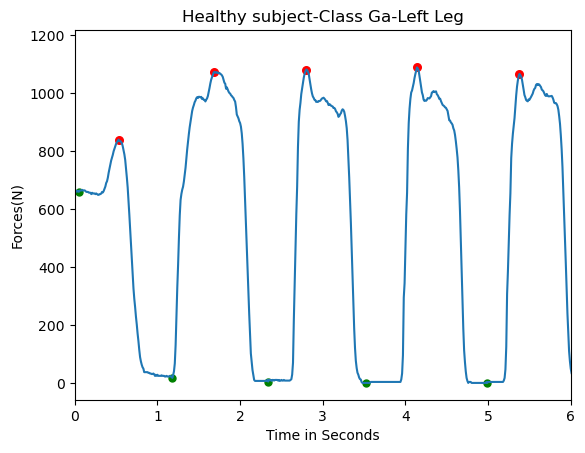

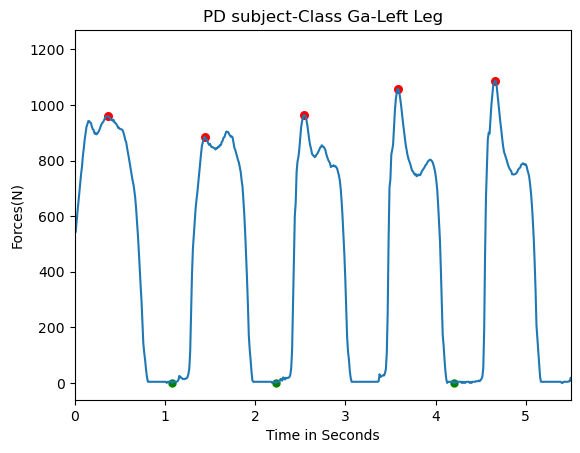

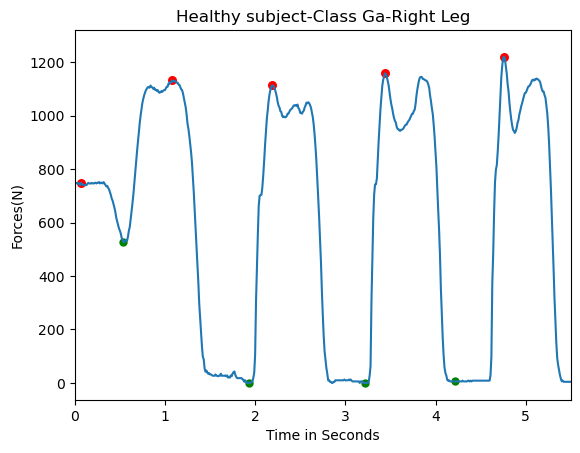

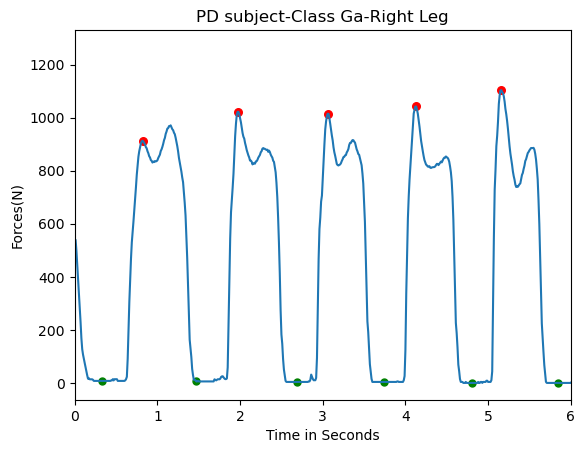

In [78]:
#function that takes dataset as inputs and plots the time domain graphs while detecting the peaks and minima
"""
The `tda` function is designed to visualize time-domain data from a CSV file by plotting time series graphs and optionally highlighting detected peaks. 

**Parameters:**
- `file_name` (str): The path to the CSV file containing the dataset. The CSV file should have a 'time' column and at least one of the following columns: 'L' (left leg) or 'R' (right leg) which represent the measured forces.

- `height` (float, default=1): The minimum height required for a peak to be detected. This is used in the `find_peaks` function from `scipy.signal`.

- `peaks` (int, default=None): Determines whether peaks should be detected and plotted. Set this to 1 to enable peak detection. If set to 0 or None, peaks will not be detected.

- `distance` (int, default=None): The minimum distance (in terms of number of data points) between detected peaks. This parameter is used in the `find_peaks` function to avoid detecting multiple peaks that are too close to each other.

- `x_lim` (tuple, default=None): Specifies the x-axis limits for the plot in the form of (xmin, xmax). If None, the x-axis will span the full range of the data.

- `sub` (int, default=None): Indicates the subject type for the title. Set to 1 for "PD" (Parkinson's Disease) or 0 for "Healthy". This will be reflected in the plot title.

- `Class` (str, default=""): A string representing the class or type of data (e.g., "Ga"). This will be included in the plot title for identification.

- `leg` (str, default=""): Specifies which leg's data to plot. Set to "L" for the left leg or "R" for the right leg. This will affect the plot legend and title. "L" and "R" should be specified in capitals.This argument must be passed for the function to work and the input to the argument must be either "L" or "R"
- 'minima' (int,default=None)- Determines whether minima shoud be detected and plotted. Set this to 1 to enable minima detection. If set to 0 or none , minima will not be detected

**Returns:**
- `pos` (numpy.ndarray): The positions (time values) where peaks are detected.
- `h` (numpy.ndarray): The heights of the detected peaks.

**Example Usage:**
pos1, h1 = tda("ga.csv", x_lim=(0, 6), sub=0, Class="Ga", peaks=1, height=1, distance=70, leg="L")
pos2, h2 = tda("Ga_Pt.csv", peaks=1, height=1, sub=1, Class="Ga", x_lim=(0, 5.5), distance=70, leg="L")
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import fftpack as fft
def tda(file_name,height=1,peaks=None,distance=None,x_lim=None,sub=None,Class="_",leg="",minima=None):
    dataset=pd.read_csv(file_name)
    data=dataset.set_index(["time"])
    x=data.index
    if leg=="L":
        y=data.L
        leg_title="Left Leg"
    elif leg=="R":
        y=data.R
        leg_title="Right Leg"
  
    plt.plot(x,y)
    if peaks==1:
        peak=find_peaks(y,height=height,distance=distance)
        h=peak[1]["peak_heights"]
        pos=x[peak[0]]
        plt.scatter(pos,h,color="r",marker="o",s=30)
    if minima==1:
        y_min=y*-1
        minima=find_peaks(y_min,distance=distance)
        min_pos=x[minima[0]]
        min_height=y.iloc[minima[0]]
        plt.scatter(min_pos,min_height,color="g",marker="o",s=25)
    if x_lim:
        plt.xlim(x_lim)
    if sub==1:
        title="PD"
    
    elif sub==0:
        title="Healthy"
    else:
        title="_"
    plt.xlabel("Time in Seconds")
    plt.ylabel("Forces(N)")
    plt.title(title+" subject-Class "+Class+"-"+leg_title)
    plt.show()
    return pos,h
pos1,h1=tda("ga.csv",x_lim=(0,6),peaks=1,height=1,distance=100,leg="L",minima=1,sub=0,Class="Ga")
pos2,h2=tda("Ga_Pt.csv",peaks=1,height=1,sub=1,Class="Ga",x_lim=(0,5.5),distance=100,leg="L",minima=1)
pos3,h3=tda("ga.csv",peaks=1,height=1,distance=100,x_lim=(0,5.5),leg="R",minima=1,sub=0,Class="Ga")
pos4,h4=tda("Ga_Pt.csv",peaks=1,height=1,sub=1,x_lim=(0,6),Class="Ga",distance=100,leg="R",minima=1)



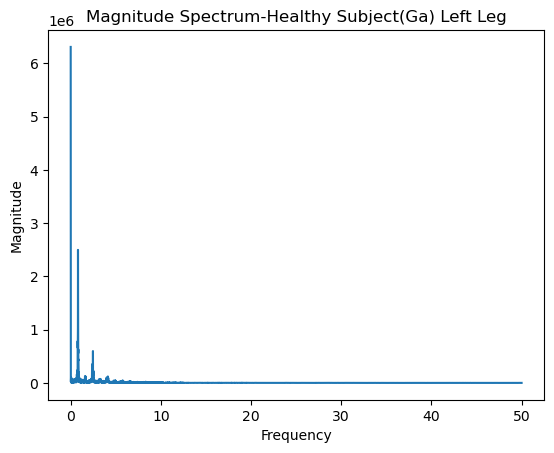

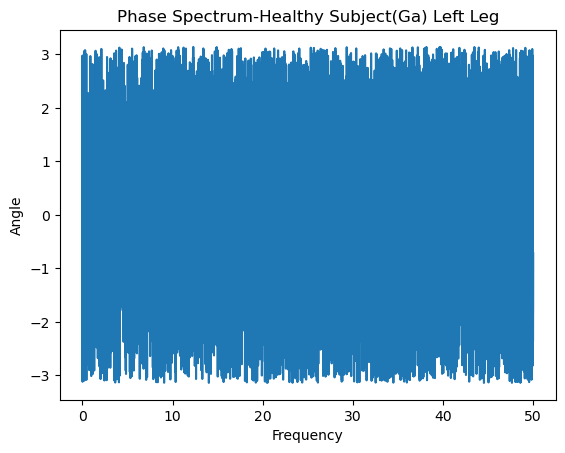

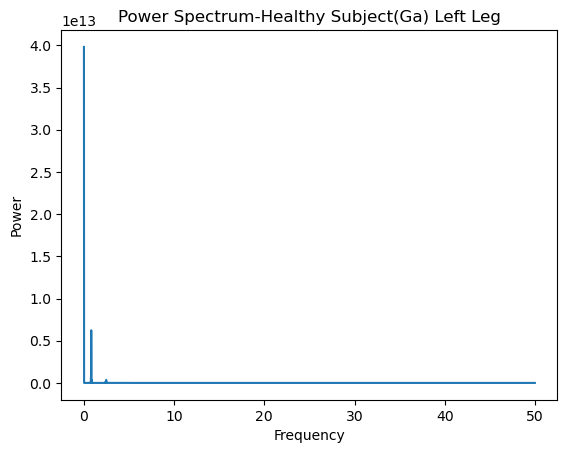

In [10]:
"""
The `fda` function is used to visualize the frequency-domain analysis of time-series data from a CSV file by plotting the magnitude spectrum, phase spectrum, and power spectrum.

**Parameters:**
- `file_name` (str): The path to the CSV file containing the dataset. The CSV file should have a 'time' column and at least one of the following columns: 'L' (left leg) or 'R' (right leg) which represent the measured forces.

- `x_lim` (tuple, default=None): Specifies the x-axis limits for the frequency plots in the form of (xmin, xmax). If None, the x-axis will span the full range of the data.

- `sub` (int, default=None): Indicates the subject type for the title. Set to 0 for "Healthy Subject" or 1 for "Parkinson's Disease Subject". This will be reflected in the plot title.

- `Class` (str, default=""): A string representing the class or type of data (e.g., "Ga"). This will be included in the plot title for identification.

- `leg` (str, default=""): Specifies which leg's data to plot. Set to "L" for the left leg or "R" for the right leg. This will affect the plot legend and title.

**Functionality:**
1. **Magnitude Spectrum Plot**: 
   - Computes the Fast Fourier Transform (FFT) of the time-series data.
   - Plots the magnitude of the FFT as a function of frequency.

2. **Phase Spectrum Plot**: 
   - Computes the phase of the FFT.
   - Plots the phase of the FFT as a function of frequency.

3. **Power Spectrum Plot**: 
   - Computes the power of the FFT, which is the square of the magnitude.
   - Plots the power as a function of frequency.

**Returns:**
- None: This function does not return any values. It generates and displays three plots showing the magnitude spectrum, phase spectrum, and power spectrum.

**Example Usage:**
fda("ga.csv", sub=0, Class="Ga", leg="L")
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import fftpack as fft
def fda(file_name,x_lim=None,sub=None,Class="",leg=""):
    dataset=pd.read_csv(file_name)
    data=dataset.set_index(["time"])
    x=data.index
    if leg=="L":
        y=data.L
        leg_title="Left Leg"
    elif leg=="R":
        y=data.R
        leg_title="Right Leg"
    if sub==0:
        title="Healthy Subject"
    elif sub==1:
        title="Healthy Subject"
    L=len(y)
    T=(x.max()-x.min())/L
    y_np=np.asarray(y)
    fft_y=fft.fft(y_np)
    f=fft.fftfreq(L,T)[:L//2]
    y_abs=np.abs(fft_y[:L//2])
    plt.figure()
    plt.plot(f,y_abs)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.title("Magnitude Spectrum-"+title+"("+Class+") "+leg_title)
    if x_lim:
        plt.xlim(x_lim)
    plt.show()
    plt.figure()
    y_angle=np.angle(fft_y[:L//2])
    plt.plot(f,y_angle)
    plt.xlabel("Frequency")
    plt.ylabel("Angle")
    plt.title("Phase Spectrum-"+title+"("+Class+") "+leg_title)
    if x_lim:
        plt.xlim(x_lim)
    plt.show()
    plt.figure()
    y_power=y_abs**2
    plt.plot(f,y_power)
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.title("Power Spectrum-"+title+"("+Class+") "+leg_title)
    if x_lim:
        plt.xlim(x_lim)
fda("ga.csv",sub=0,Class="Ga",leg="L")